<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span><ul class="toc-item"><li><span><a href="#Импортируем-данные" data-toc-modified-id="Импортируем-данные-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импортируем данные</a></span></li><li><span><a href="#Выберем-топ-10-городов-по-количеству-рейсов" data-toc-modified-id="Выберем-топ-10-городов-по-количеству-рейсов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Выберем топ-10 городов по количеству рейсов</a></span></li><li><span><a href="#Построим-графики" data-toc-modified-id="Построим-графики-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Построим графики</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Импортируем данные

In [39]:
model_flights = pd.read_csv('/datasets/query_1.csv')
city_flights_avg = pd.read_csv('/datasets/query_3.csv')

###### Изучим данные о модялях самолетов и рейсах для каждой из них

In [40]:

display(model_flights.head())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [41]:
model_flights.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [42]:
model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [43]:
model_flights.isnull().sum()

model             0
flights_amount    0
dtype: int64

In [44]:
model_flights.duplicated().sum()

0

Рассматриваем 8 моделей самолетов и 8 рейсов. Данные без пропусков и дубликатов, готовы к анализу. Типы данных соответствуют значениям в столбцах.

###### Изучим информацию о городах и рейсах, пребывающих в них

In [45]:
display(city_flights_avg.head())

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [46]:
city_flights_avg.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [47]:
city_flights_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [48]:
city_flights_avg.isnull().sum()

city               0
average_flights    0
dtype: int64

In [49]:
city_flights_avg.duplicated().sum()

0

Рассматриваем 101 город, столько же рейсов. Видим, что данные без пропусков и дубликатов. Среднее количество прибывающих в город имеет тип float, но количество рейсов хотелось бы видеть целым числом, поэтому округлим значения в столбце и изменим тип с плавающей точкой на целочисленный.

In [50]:
for i in range(0,len(city_flights_avg)):
    city_flights_avg['average_flights'][i] = round(city_flights_avg['average_flights'][i])
city_flights_avg['average_flights']=city_flights_avg['average_flights'].astype('int64')    
display(city_flights_avg.head())



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,city,average_flights
0,Абакан,4
1,Анадырь,1
2,Анапа,2
3,Архангельск,5
4,Астрахань,2


### Выберем топ-10 городов по количеству рейсов

In [51]:
from pyspark.sql import SparkSession

APP_NAME = "DataFrames"
SPARK_URL = "local[*]"

spark = SparkSession.builder.appName(APP_NAME) \
        .config('spark.ui.showConsoleProgress', 'false') \
        .getOrCreate()

city_avgflights = spark.read.load('/datasets/query_3.csv', 
                       format='csv', header='true', inferSchema='true')
city_avgflights.registerTempTable("city_avgflights")

print(spark.sql("SELECT *  FROM city_avgflights ORDER BY average_flights DESC").show(10))

+---------------+------------------+
|           city|   average_flights|
+---------------+------------------+
|         Москва| 129.7741935483871|
|Санкт-Петербург|31.161290322580644|
|    Новосибирск|17.322580645161292|
|     Красноярск|11.580645161290322|
|   Екатеринбург| 11.32258064516129|
| Ростов-на-Дону|10.193548387096774|
|          Пермь|10.129032258064516|
|         Брянск|              10.0|
|           Сочи| 9.612903225806452|
|      Ульяновск| 9.580645161290322|
+---------------+------------------+
only showing top 10 rows

None


Самый популярный город для посещения - Москва, затем Санкт-Петербург, а после Новосибирск. Но количество рейсов в Москву почти в 4 раза больше чем, количество рейсов в Петербург. Скорее всего все возвращяются домой с отпусков.

### Построим графики

###### Посмотрим какие модели пользуются большей полпулярностью, чем остальные

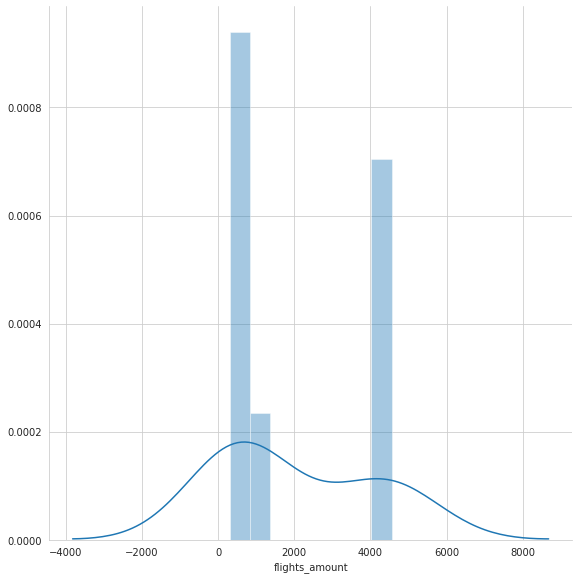

In [52]:
sns.FacetGrid(model_flights['flights_amount'], height=8)
sns.set_style("whitegrid")
sns.distplot(model_flights['flights_amount'], bins=8)

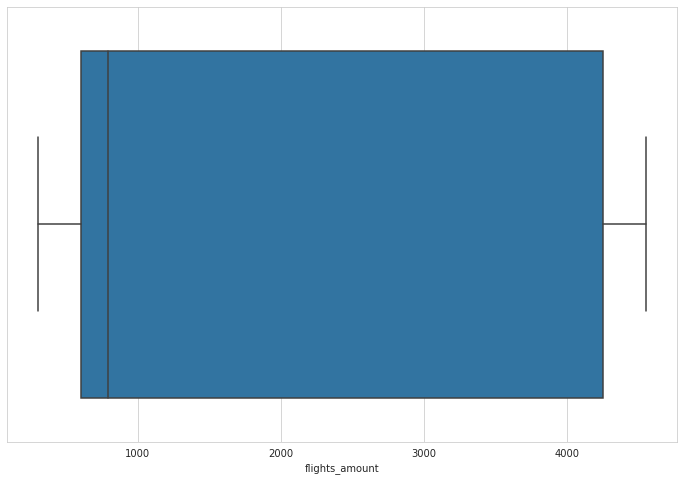

In [53]:
plt.figure(figsize=(12, 8))
sns.boxplot(model_flights['flights_amount'])
plt.show()

In [54]:
display(model_flights.query('flights_amount > 1000'))

,model,flights_amount
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Есть топ-3 самых популярных моделей самолетов у авиакомпаний.

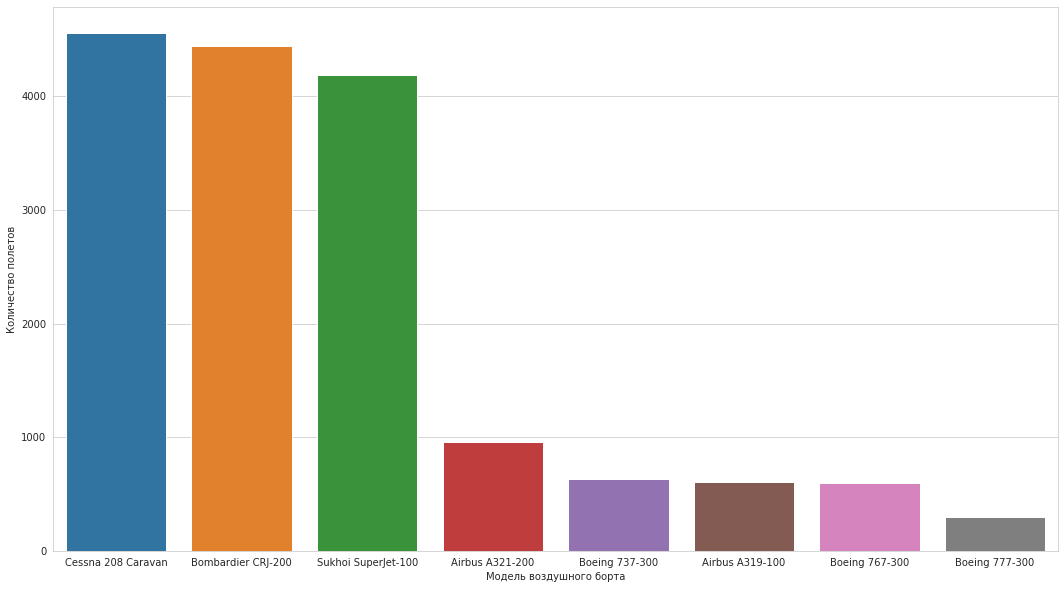

In [55]:
model_flights = model_flights.sort_values(by='flights_amount', ascending=False)
plt.figure(figsize=(18, 10))
sns.barplot(x=model_flights['model'], y=model_flights['flights_amount'])
plt.xlabel('Модель воздушного борта')
plt.ylabel('Количество полетов')
plt.show()

Существенное различие наводит на мысль, может быть первая 3-ца имеет недорогое обслуживание, либо их стоимость не так велика, но явные преимущества точно есть. Если были бы технические характеристики, то можно было построить схему и выявить их показатели конкурентоспособности. Также возможен вариант того, что такой отрыв все же связан с тем, что лидеры - мелкие самолеты. Скорее всего, они летают, часто или в труднодоступных регионах. Расстояния короткие, вот и количество рейсов такое большое

###### Посмотрим на самые популярные города

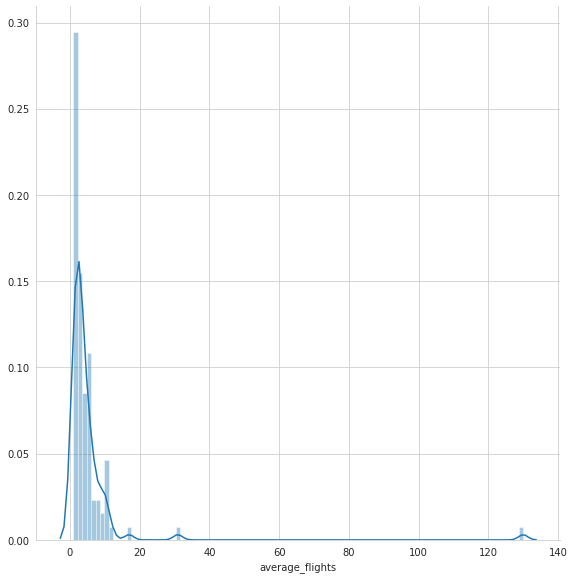

In [56]:
sns.FacetGrid(city_flights_avg['average_flights'], height=8)
sns.set_style("whitegrid")
sns.distplot(city_flights_avg['average_flights'], bins=101)

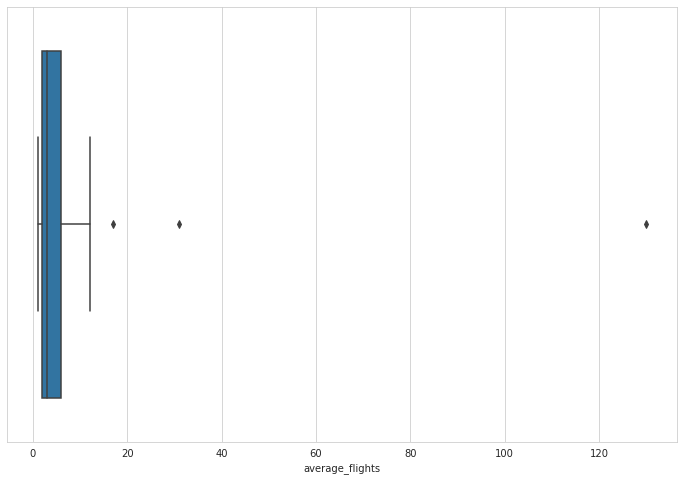

In [57]:
plt.figure(figsize=(12, 8))
sns.boxplot(city_flights_avg['average_flights'])
plt.show()

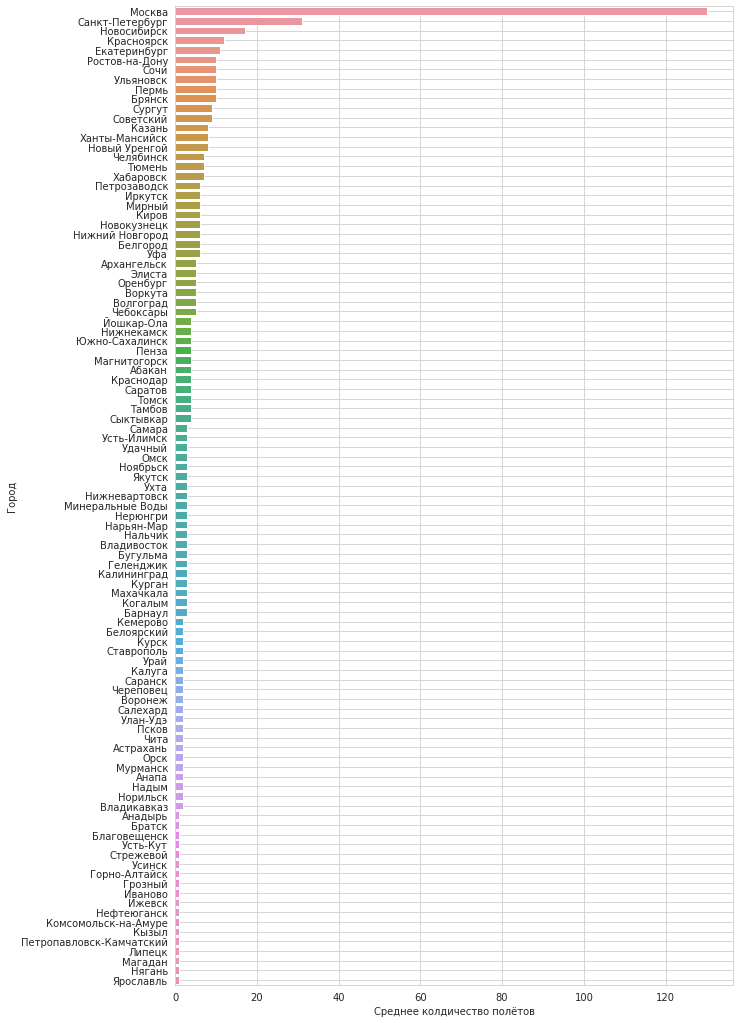

In [59]:
city_flights_avg = city_flights_avg.sort_values(by='average_flights', ascending=False)
plt.figure(figsize=(10, 18))
sns.barplot(x=city_flights_avg['average_flights'], y=city_flights_avg['city'])
plt.xlabel('Среднее колдичество полётов')
plt.ylabel('Город')
plt.grid(True)
plt.show()

На этом графике очевидно, что мегаполисы лидируют.

###### Посмотрим на топ-10

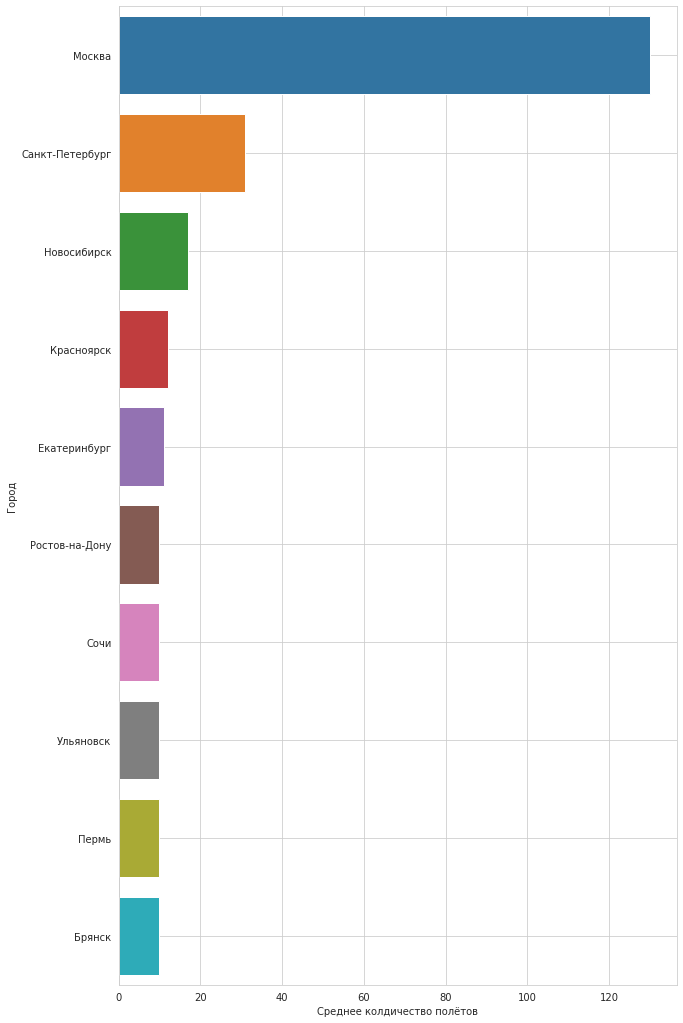

In [61]:
city_flights_avg_top10 = city_flights_avg.head(10)
plt.figure(figsize=(10, 18))
sns.barplot(x=city_flights_avg_top10['average_flights'], y=city_flights_avg_top10['city'])
plt.xlabel('Среднее колдичество полётов')
plt.ylabel('Город')
plt.grid(True)
plt.show()

## Вывод

Мы проанализировали популярные модели самолетов и популярных городов.

Если про самолеты мы можем мало сказать в связи отсутствия тех. и экон. характеристик, которые помогли бы нам выявить показатели конкурентоспособности и причины выбора данных моделей авиакомпаниями, то вот про города можно сказать здесь больше. Во-первых тут все очевидно, что мегаполисы, где есть промышленность, мл и ср бизнес, инфраструктура, и тп буду в приоритете выбора полета. Также, как правило в таких городах у населения и по бюджету возможностей больше, чтобы полетать, возможно, если бы были данные по поездам или информация по въездам-выездам постов(автомобильные движения), то картина могла бы поменяться.
Можно еще добавить, что данные у нас за сентябрь, время возвращаться с отпусков и каникул. 

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Файлы изучены
- [ ]  Типы данных проверены на корректность
- [ ]  Выбран топ-10 городов по количеству рейсов
- [ ]  Построен график «Модели самолётов и количество рейсов»
- [ ]  Построен график «Города и количество рейсов»
- [ ]  Построен график «Топ-10 городов и количество рейсов»
- [ ]  На каждом этапе написаны выводы
- [ ]  Написан общий вывод